In [ ]:
import numpy as np
import torch
from torch import nn

import matplotlib.pyplot as plt

torch.__version__


'2.2.1+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available()  else 'cpu'

In [ ]:
device

'cuda'

DATA Prepartion

In [ ]:
# Data preparing and loading

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = x * weight + bias

In [ ]:
y, x

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460],
         [0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.0000],
         [0.0200],
         [

In [ ]:
x.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [ ]:
# Splitting data

train = int(0.8 * len(x))

x_train  ,y_train= x[:train] , y[:train]

x_test  ,y_test= x[train:] , y[train:]

x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

In [ ]:
# Visualize

def plot_prediction(train_data = x_train,
                    test_data = x_test,
                    train_label = y_train,
                    test_label = y_test, predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label, c='b',s=4, label='Trainig Data')
  plt.scatter(test_data,test_label, c='g', s=4,label='Test Data')
  if predictions !=None:
    plt.scatter(test_data,predictions, c='r',s=4, label='Predictions')

  plt.legend(prop={'size': 14})


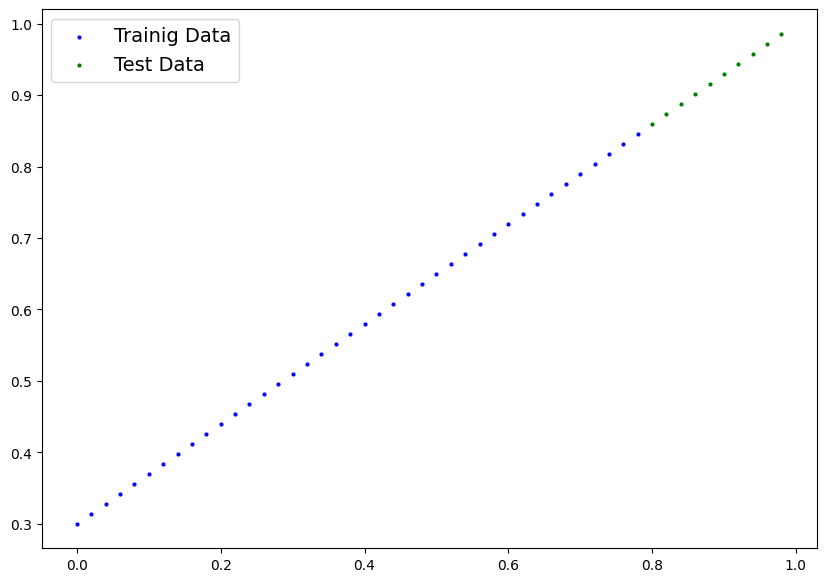

In [ ]:
plot_prediction()

Build Model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float))


  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Loss function
loss = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01)

In [ ]:
epochs = 200

for epoch in range(epochs):

  y_pred = model_0(x_train)
  loss_train = loss(y_pred, y_train)

  optimizer.zero_grad()

  loss_train.backward()
  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(x_test)

    loss_test = loss(test_pred,y_test)

  if epoch % 10 == 0 :
    print(f" Epoch: {epoch} | loss: {loss_train} | Test Loss: {loss_test}")




 Epoch: 0 | loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
 Epoch: 10 | loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
 Epoch: 20 | loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
 Epoch: 30 | loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
 Epoch: 40 | loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
 Epoch: 50 | loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
 Epoch: 60 | loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
 Epoch: 70 | loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
 Epoch: 80 | loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
 Epoch: 90 | loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
 Epoch: 100 | loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
 Epoch: 110 | loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
 Epoch: 120 | loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
 Epoch: 130 | loss: 0.014155393466353416 | Test Loss: 0.032332

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [ ]:
with torch.inference_mode():

  test_pred = model_0(x_test)


In [ ]:
test_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

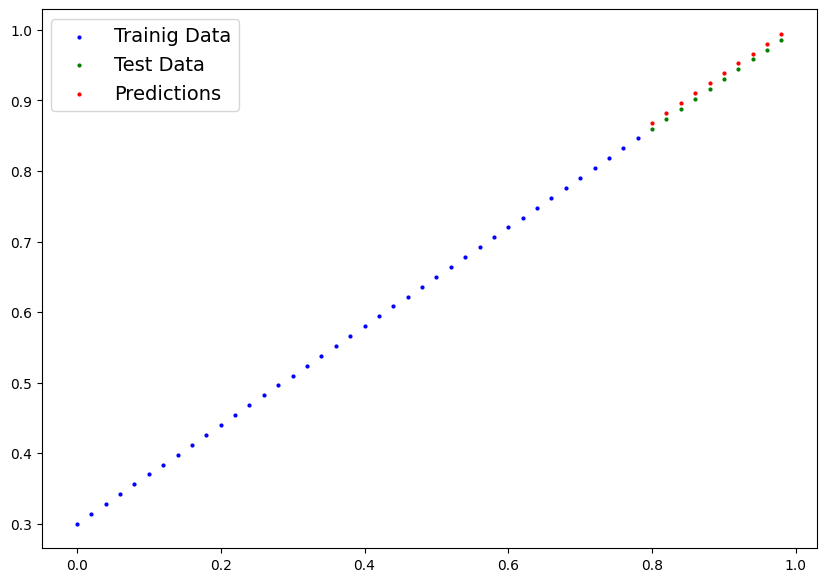

In [ ]:
plot_prediction(predictions= test_pred)

In [ ]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'Pytorch_Workflow.pth'

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(MODEL_SAVE_PATH)

models/Pytorch_Workflow.pth


In [ ]:
torch.save(obj= model_0.state_dict(),
           f = MODEL_SAVE_PATH)

In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<All keys matched successfully>

In [ ]:
class LinearRegressionModelV2(nn.Module):

  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.01)

In [ ]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
torch.manual_seed(42)

epochs = 200

x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(x_train)

  loss= loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)
    test_loss = loss_fn(test_pred,y_test)


  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, | Loss: {loss} , | Test Loss: {test_loss}")


Epoch: 0, | Loss: 0.5551779866218567 , | Test Loss: 0.5739762187004089
Epoch: 10, | Loss: 0.439968079328537 , | Test Loss: 0.4392664134502411
Epoch: 20, | Loss: 0.3247582018375397 , | Test Loss: 0.30455657839775085
Epoch: 30, | Loss: 0.20954833924770355 , | Test Loss: 0.16984669864177704
Epoch: 40, | Loss: 0.09433845430612564 , | Test Loss: 0.03513690456748009
Epoch: 50, | Loss: 0.023886388167738914 , | Test Loss: 0.04784907028079033
Epoch: 60, | Loss: 0.019956795498728752 , | Test Loss: 0.045803118497133255
Epoch: 70, | Loss: 0.016517987474799156 , | Test Loss: 0.037530567497015
Epoch: 80, | Loss: 0.013089174404740334 , | Test Loss: 0.02994490973651409
Epoch: 90, | Loss: 0.009653178043663502 , | Test Loss: 0.02167237363755703
Epoch: 100, | Loss: 0.006215683650225401 , | Test Loss: 0.014086711220443249
Epoch: 110, | Loss: 0.00278724217787385 , | Test Loss: 0.005814164876937866
Epoch: 120, | Loss: 0.0012645035749301314 , | Test Loss: 0.013801801018416882
Epoch: 130, | Loss: 0.0012645035

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_pred = model_1(x_test)
  loss = loss_fn(test_pred, x_test)


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

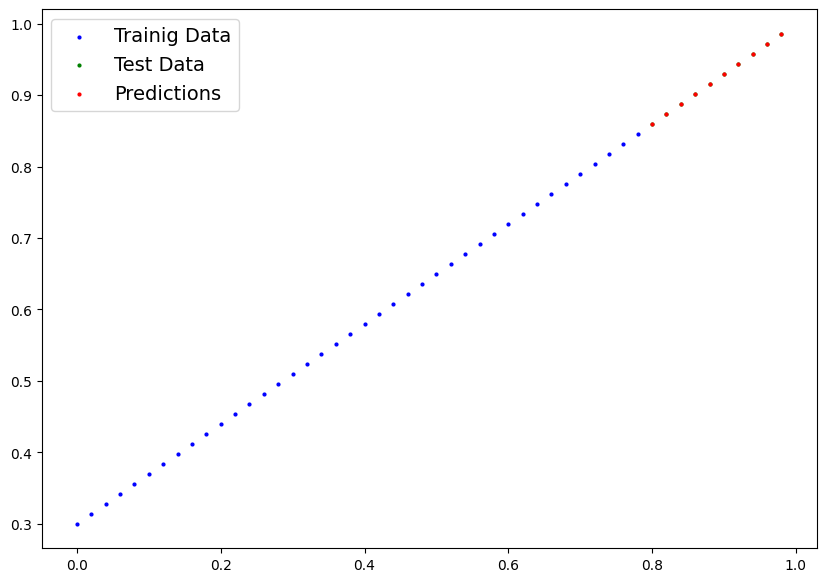

In [ ]:
plot_prediction(predictions = y_pred.to('cpu'))

In [ ]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "Pytorch_Workflow_2"

MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(MODEL_SAVE_PATH)

models/Pytorch_Workflow_2


In [ ]:
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
next(loaded_model_1.parameters())

Parameter containing:
tensor([[0.6968]], device='cuda:0', requires_grad=True)

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_y_pred = loaded_model_1(x_test)
  loss = loss_fn(loaded_model_y_pred, x_test)

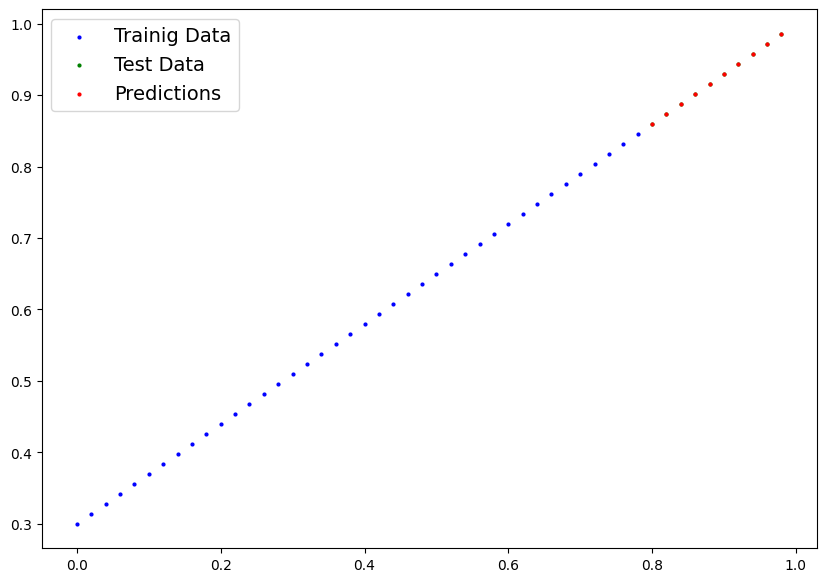

In [ ]:
plot_prediction(predictions = y_pred.to('cpu'))